# 1.0 Initialization

In [1]:
# import the libraries for data processing
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the libraries for classification modelling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

In [2]:
# define and store the activities label in a few lists to be used to build the classification model
activity_label_1 = ['swipt_left']*32
activity_label_2 = ['swipt_right']*32
activity_label_3 = ['wave']*32
activity_label_4 = ['clap']*32
activity_label_5 = ['throw']*32
activity_label_6 = ['arm_cross']*32
activity_label_7 = ['basketball_shoot']*32
activity_label_8 = ['draw_x']*31
activity_label_9 = ['draw_circle_cw']*32
activity_label_10 = ['draw_circle_ccw']*32
activity_label_11 = ['draw_triangle']*32
activity_label_12 = ['bowling']*32
activity_label_13 = ['boxing']*32
activity_label_14 = ['baseball_swing']*32
activity_label_15 = ['tennis_swing']*32
activity_label_16 = ['arm_curl']*32
activity_label_17 = ['tennis_serve']*32
activity_label_18 = ['push']*32
activity_label_19 = ['knock']*32
activity_label_20 = ['catch']*32
activity_label_21 = ['pickup_throw']*32

activity_label_22 = ['jog']*32
activity_label_23 = ['walk']*31
activity_label_24 = ['sit2stand']*32
activity_label_25 = ['stand2sit']*32
activity_label_26 = ['lunge']*32
activity_label_27 = ['squat']*31

full_5_activity_label = activity_label_1 + activity_label_2 + activity_label_3 + activity_label_4 + activity_label_5

full_10_activity_label = activity_label_1 + activity_label_2 + activity_label_3 + activity_label_4 + activity_label_5 + \
                        activity_label_6 + activity_label_7 + activity_label_8 + activity_label_9 + activity_label_10

full_15_activity_label = activity_label_1 + activity_label_2 + activity_label_3 + activity_label_4 + activity_label_5 + \
                        activity_label_6 + activity_label_7 + activity_label_8 + activity_label_9 + activity_label_10 + \
                        activity_label_11 + activity_label_12 + activity_label_13 + activity_label_14 + activity_label_15

full_21_activity_label = activity_label_1 + activity_label_2 + activity_label_3 + activity_label_4 + activity_label_5 + \
                        activity_label_6 + activity_label_7 + activity_label_8 + activity_label_9 + activity_label_10 + \
                        activity_label_11 + activity_label_12 + activity_label_13 + activity_label_14 + activity_label_15 + \
                        activity_label_16 + activity_label_17 + activity_label_18 + activity_label_19 + activity_label_20 + \
                        activity_label_21
                        
full_27_activity_label = activity_label_1 + activity_label_2 + activity_label_3 + activity_label_4 + activity_label_5 + \
                        activity_label_6 + activity_label_7 + activity_label_8 + activity_label_9 + activity_label_10 + \
                        activity_label_11 + activity_label_12 + activity_label_13 + activity_label_14 + activity_label_15 + \
                        activity_label_16 + activity_label_17 + activity_label_18 + activity_label_19 + activity_label_20 + \
                        activity_label_21 + activity_label_22 + activity_label_23 + activity_label_24 + activity_label_25 + \
                        activity_label_26 + activity_label_27

In [3]:
# Select the set of activity label to be classified
# 1. full_5_activity_label
# 2. full_10_activity_label
# 3. full_15_activity_label
# 4. full_21_activity_label
# 5. full_17_activity_label
complete_activity_label = full_5_activity_label

# Define the number of activity to be classified
# 1. 5
# 2. 10
# 3. 15
# 4. 21
# 5. 27
activity_number = 5

# 2.0 Data Processing

## 2.1 Inertial data processing

In [4]:
#########################################################
###Read the Inertial data and store in as a dictionary###
#########################################################
subject_number = 8
trial_number = 4

i = 0
j = 0
k = 0

count = 0
inertial = {}

print("Start of reading......")

for i in range(activity_number):  
    i = i + 1
    for j in range(subject_number):
        j = j + 1
        
        # change the trial number to 3 for three subject with removed corrupted trial set 
        if (i == 8 and j == 1) or (i == 23 and j == 6) or (i == 27 and j == 8):
            trial_number = 3
        else:
            trial_number = 4
      
        for k in range(trial_number):
            k = k + 1
            
            inertial["a{0}_s{1}_t{2}_inertial".format(i,j,k)] = scipy.io.loadmat('a' + str(i) + '_s' + str(j) + '_t' + str(k) + '_inertial.mat')
            inertial["a{0}_s{1}_t{2}_inertial".format(i,j,k)] = inertial["a{0}_s{1}_t{2}_inertial".format(i,j,k)]['d_iner']

            curr_inertial = inertial["a{0}_s{1}_t{2}_inertial".format(i,j,k)]
                
            print('a' + str(i) + '_s' + str(j) + '_t' + str(k) + '_inertial: ' + str(inertial['a{0}_s{1}_t{2}_inertial'.format(i,j,k)].shape))
            
            count =  count + 1

print("End of reading......")
print(str(count) + " of dataset been read and stored.")

Start of reading......
a1_s1_t1_inertial: (160, 6)
a1_s1_t2_inertial: (154, 6)
a1_s1_t3_inertial: (165, 6)
a1_s1_t4_inertial: (158, 6)
a1_s2_t1_inertial: (142, 6)
a1_s2_t2_inertial: (156, 6)
a1_s2_t3_inertial: (143, 6)
a1_s2_t4_inertial: (157, 6)
a1_s3_t1_inertial: (146, 6)
a1_s3_t2_inertial: (127, 6)
a1_s3_t3_inertial: (125, 6)
a1_s3_t4_inertial: (150, 6)
a1_s4_t1_inertial: (145, 6)
a1_s4_t2_inertial: (143, 6)
a1_s4_t3_inertial: (142, 6)
a1_s4_t4_inertial: (160, 6)
a1_s5_t1_inertial: (186, 6)
a1_s5_t2_inertial: (170, 6)
a1_s5_t3_inertial: (190, 6)
a1_s5_t4_inertial: (180, 6)
a1_s6_t1_inertial: (187, 6)
a1_s6_t2_inertial: (180, 6)
a1_s6_t3_inertial: (183, 6)
a1_s6_t4_inertial: (189, 6)
a1_s7_t1_inertial: (149, 6)
a1_s7_t2_inertial: (163, 6)
a1_s7_t3_inertial: (143, 6)
a1_s7_t4_inertial: (141, 6)
a1_s8_t1_inertial: (197, 6)
a1_s8_t2_inertial: (169, 6)
a1_s8_t3_inertial: (181, 6)
a1_s8_t4_inertial: (169, 6)
a2_s1_t1_inertial: (166, 6)
a2_s1_t2_inertial: (146, 6)
a2_s1_t3_inertial: (139, 

In [5]:
############################################################################
###Identify the minimum number of frame for Inertial dataset and store it###
############################################################################
inverse_inertial = [(key, value) for key, value in inertial.items()]

iner_frame_min = inverse_inertial[0][1].shape[0]

for item in range(len(inverse_inertial)):
    iner_frame_min = min(iner_frame_min, inverse_inertial[item][1].shape[0])

print(iner_frame_min)

122


In [6]:
#####################################################################################
###reshape the Inertial dataset to 1-D array using the minimum number of frame and###
###stacked up to become 2-D array to be fit into the classification model############
#####################################################################################
for i in range(activity_number):  
    i = i + 1
    for j in range(subject_number):
        j = j + 1
        
        # change the trial number to 3 for three subject with removed corrupted trial set 
        if (i == 8 and j == 1) or (i == 23 and j == 6) or (i == 27 and j == 8):
            trial_number = 3
        else:
            trial_number = 4
      
        for k in range(trial_number):
            k = k + 1

            curr_inertial = inertial["a{0}_s{1}_t{2}_inertial".format(i,j,k)]
            
            if i == 1 and j == 1 and k == 1:
                iner_cut = curr_inertial[:iner_frame_min,:6]
                d2_temp_iner_first = iner_cut.reshape(iner_frame_min*6)
                combined_iner = np.vstack((d2_temp_iner_first,))
            else:
                iner_cut = curr_inertial[:iner_frame_min,:6]
                d2_temp_iner_rest = iner_cut.reshape(iner_frame_min*6)
                combined_iner = np.vstack((combined_iner, d2_temp_iner_rest))
                            
            count =  count + 1

In [7]:
############################################
###verify the reshaped Inertial dataframe###
############################################
inertial_features = np.array(combined_iner)
inertial_features.shape

(160, 732)

## 2.2 Skeleton data processing

In [8]:
#########################################################
###Read the Skeleton data and store in as a dictionary###
#########################################################
subject_number = 8
trial_number = 4

i = 0
j = 0
k = 0

count = 0
skeleton = {}

print("Start of reading......")

for i in range(activity_number):  
    i = i + 1
    for j in range(subject_number):
        j = j + 1
        
        # change the trial number to 3 for three subject with removed corrupted trial set 
        if (i == 8 and j == 1) or (i == 23 and j == 6) or (i == 27 and j == 8):
            trial_number = 3
        else:
            trial_number = 4
      
        for k in range(trial_number):
            k = k + 1
            
            skeleton["a{0}_s{1}_t{2}_skeleton".format(i,j,k)] = scipy.io.loadmat('a' + str(i) + '_s' + str(j) + '_t' + str(k) + '_skeleton.mat')
            skeleton["a{0}_s{1}_t{2}_skeleton".format(i,j,k)] = skeleton["a{0}_s{1}_t{2}_skeleton".format(i,j,k)]['d_skel']

            curr_skeleton = skeleton["a{0}_s{1}_t{2}_skeleton".format(i,j,k)]
                
            print('a' + str(i) + '_s' + str(j) + '_t' + str(k) + '_skeleton: ' + str(skeleton['a{0}_s{1}_t{2}_skeleton'.format(i,j,k)].shape))
            
            count =  count + 1
            
print("End of reading......")
print(str(count) + " of dataset been read and stored.")

Start of reading......
a1_s1_t1_skeleton: (20, 3, 48)
a1_s1_t2_skeleton: (20, 3, 52)
a1_s1_t3_skeleton: (20, 3, 53)
a1_s1_t4_skeleton: (20, 3, 61)
a1_s2_t1_skeleton: (20, 3, 58)
a1_s2_t2_skeleton: (20, 3, 60)
a1_s2_t3_skeleton: (20, 3, 56)
a1_s2_t4_skeleton: (20, 3, 55)
a1_s3_t1_skeleton: (20, 3, 56)
a1_s3_t2_skeleton: (20, 3, 52)
a1_s3_t3_skeleton: (20, 3, 50)
a1_s3_t4_skeleton: (20, 3, 58)
a1_s4_t1_skeleton: (20, 3, 55)
a1_s4_t2_skeleton: (20, 3, 56)
a1_s4_t3_skeleton: (20, 3, 56)
a1_s4_t4_skeleton: (20, 3, 63)
a1_s5_t1_skeleton: (20, 3, 69)
a1_s5_t2_skeleton: (20, 3, 63)
a1_s5_t3_skeleton: (20, 3, 72)
a1_s5_t4_skeleton: (20, 3, 68)
a1_s6_t1_skeleton: (20, 3, 71)
a1_s6_t2_skeleton: (20, 3, 71)
a1_s6_t3_skeleton: (20, 3, 70)
a1_s6_t4_skeleton: (20, 3, 72)
a1_s7_t1_skeleton: (20, 3, 59)
a1_s7_t2_skeleton: (20, 3, 62)
a1_s7_t3_skeleton: (20, 3, 56)
a1_s7_t4_skeleton: (20, 3, 55)
a1_s8_t1_skeleton: (20, 3, 76)
a1_s8_t2_skeleton: (20, 3, 66)
a1_s8_t3_skeleton: (20, 3, 69)
a1_s8_t4_skeleto

In [9]:
############################################################################
###Identify the minimum number of frame for Skeleton dataset and store it###
############################################################################
inverse_skeleton = [(key, value) for key, value in skeleton.items()]

skel_frame_min = inverse_skeleton[0][1].shape[2]

for item in range(len(inverse_skeleton)):
    skel_frame_min = min(skel_frame_min, inverse_skeleton[item][1].shape[2])

print(skel_frame_min)

44


In [10]:
#####################################################################################
###reshape the Skeleton dataset to 1-D array using the minimum number of frame and###
###stacked up to become 2-D array to be fit into the classification model############
#####################################################################################
for i in range(activity_number):  
    i = i + 1
    for j in range(subject_number):
        j = j + 1
        
        # change the trial number to 3 for three subject with removed corrupted trial set 
        if (i == 8 and j == 1) or (i == 23 and j == 6) or (i == 27 and j == 8):
            trial_number = 3
        else:
            trial_number = 4
      
        for k in range(trial_number):
            k = k + 1

            curr_skeleton = skeleton["a{0}_s{1}_t{2}_skeleton".format(i,j,k)]
            
            if i == 1 and j == 1 and k == 1:
                skel_cut = curr_skeleton[:20,:3,:skel_frame_min]
                d2_temp_skel_first = skel_cut.reshape(20*3*skel_frame_min)
                combined_skel = np.vstack((d2_temp_skel_first,))
            else:
                skel_cut = curr_skeleton[:20,:3,:skel_frame_min]
                d2_temp_skel_rest = skel_cut.reshape(20*3*skel_frame_min)
                combined_skel = np.vstack((combined_skel, d2_temp_skel_rest))
                            
            count =  count + 1

In [11]:
############################################
###verify the reshaped Skeleton dataframe###
############################################
skeleton_features = np.array(combined_skel)
skeleton_features.shape

(160, 2640)

## 2.3 Depth data processing

In [12]:
######################################################
###Read the Depth data and store in as a dictionary###
######################################################
subject_number = 8
trial_number = 4

i = 0
j = 0
k = 0

count = 0
depth = {}

print("Start of reading......")

for i in range(activity_number):  
    i = i + 1
    for j in range(subject_number):
        j = j + 1
        
        # change the trial number to 3 for three subject with removed corrupted trial set 
        if (i == 8 and j == 1) or (i == 23 and j == 6) or (i == 27 and j == 8):
            trial_number = 3
        else:
            trial_number = 4
      
        for k in range(trial_number):
            k = k + 1
            
            depth["a{0}_s{1}_t{2}_depth".format(i,j,k)] = scipy.io.loadmat('a' + str(i) + '_s' + str(j) + '_t' + str(k) + '_depth.mat')
            depth["a{0}_s{1}_t{2}_depth".format(i,j,k)] = depth["a{0}_s{1}_t{2}_depth".format(i,j,k)]['d_depth']

            curr_skeleton = depth["a{0}_s{1}_t{2}_depth".format(i,j,k)]
                
            print('a' + str(i) + '_s' + str(j) + '_t' + str(k) + '_depth: ' + str(depth['a{0}_s{1}_t{2}_depth'.format(i,j,k)].shape))
            
            count =  count + 1
            
print("End of reading......")
print(str(count) + " of dataset been read and stored.")

Start of reading......
a1_s1_t1_depth: (240, 320, 48)
a1_s1_t2_depth: (240, 320, 52)
a1_s1_t3_depth: (240, 320, 53)
a1_s1_t4_depth: (240, 320, 61)
a1_s2_t1_depth: (240, 320, 58)
a1_s2_t2_depth: (240, 320, 60)
a1_s2_t3_depth: (240, 320, 56)
a1_s2_t4_depth: (240, 320, 55)
a1_s3_t1_depth: (240, 320, 56)
a1_s3_t2_depth: (240, 320, 52)
a1_s3_t3_depth: (240, 320, 50)
a1_s3_t4_depth: (240, 320, 58)
a1_s4_t1_depth: (240, 320, 55)
a1_s4_t2_depth: (240, 320, 56)
a1_s4_t3_depth: (240, 320, 56)
a1_s4_t4_depth: (240, 320, 63)
a1_s5_t1_depth: (240, 320, 69)
a1_s5_t2_depth: (240, 320, 63)
a1_s5_t3_depth: (240, 320, 72)
a1_s5_t4_depth: (240, 320, 68)
a1_s6_t1_depth: (240, 320, 71)
a1_s6_t2_depth: (240, 320, 71)
a1_s6_t3_depth: (240, 320, 70)
a1_s6_t4_depth: (240, 320, 72)
a1_s7_t1_depth: (240, 320, 59)
a1_s7_t2_depth: (240, 320, 62)
a1_s7_t3_depth: (240, 320, 56)
a1_s7_t4_depth: (240, 320, 55)
a1_s8_t1_depth: (240, 320, 76)
a1_s8_t2_depth: (240, 320, 66)
a1_s8_t3_depth: (240, 320, 69)
a1_s8_t4_depth: 

In [13]:
#########################################################################
###Identify the minimum number of frame for Depth dataset and store it###
#########################################################################
inverse_depth = [(key, value) for key, value in depth.items()]

depth_frame_min = inverse_depth[0][1].shape[2]

for item in range(len(inverse_depth)):
    depth_frame_min = min(depth_frame_min, inverse_depth[item][1].shape[2])

print(depth_frame_min)

44


In [14]:
##################################################################################
###reshape the Depth dataset to 1-D array using the minimum number of frame and###
###stacked up to become 2-D array to be fit into the classification model#########
##################################################################################
for i in range(activity_number):  
    i = i + 1
    for j in range(subject_number):
        j = j + 1
        
        # change the trial number to 3 for three subject with removed corrupted trial set 
        if (i == 8 and j == 1) or (i == 23 and j == 6) or (i == 27 and j == 8):
            trial_number = 3
        else:
            trial_number = 4
      
        for k in range(trial_number):
            k = k + 1

            curr_depth = depth["a{0}_s{1}_t{2}_depth".format(i,j,k)]
            
            if i == 1 and j == 1 and k == 1:
                depth_cut = curr_depth[:240,:320,:depth_frame_min]
                d2_temp_depth_first = depth_cut.reshape(240*320*depth_frame_min)
                combined_depth = np.vstack((d2_temp_depth_first,))
            else:
                depth_cut = curr_depth[:240,:320,:depth_frame_min]
                d2_temp_depth_rest = depth_cut.reshape(240*320*depth_frame_min)
                combined_depth = np.vstack((combined_depth, d2_temp_depth_rest))
                            
            count =  count + 1

In [15]:
#########################################
###verify the reshaped Depth dataframe###
#########################################
depth_features = np.array(combined_depth)
depth_features.shape

(160, 3379200)

# 3.0 Data Modelling using Gaussian Naive Bayes

In [16]:
#########################################################
###define a function to visualise the confusion matrix###
#########################################################
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
# define the test train split random_state seed
seed = 123
gnb = GaussianNB()

## 3.1 Action Recognition using Inertial Dataset

In [18]:
# perform test train split for classification model building using inertial features
x_train_inertial, x_test_inertial, y_train_inertial, y_test_inertial = train_test_split(inertial_features, complete_activity_label, test_size=0.25, random_state=seed)

In [19]:
# fit the model
inertial_gnb_model = gnb.fit(x_train_inertial, y_train_inertial)

In [20]:
# predict the action using the built classsification model
y_predicted_inertial = inertial_gnb_model.predict(x_test_inertial)

In [21]:
# evaluate the confusion matrix and accuracy of model built using test data of inertial dataset
print(confusion_matrix(y_test_inertial, y_predicted_inertial))
print(classification_report(y_test_inertial, y_predicted_inertial))

score = accuracy_score(y_test_inertial, y_predicted_inertial)
print("Validation accuracy: {:.2%}".format(score))

[[ 2  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  1  9  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0  7]]
             precision    recall  f1-score   support

       clap       1.00      1.00      1.00         2
 swipt_left       0.91      1.00      0.95        10
swipt_right       1.00      0.90      0.95        10
      throw       1.00      1.00      1.00        11
       wave       1.00      1.00      1.00         7

avg / total       0.98      0.97      0.97        40

Validation accuracy: 97.50%


Confusion matrix


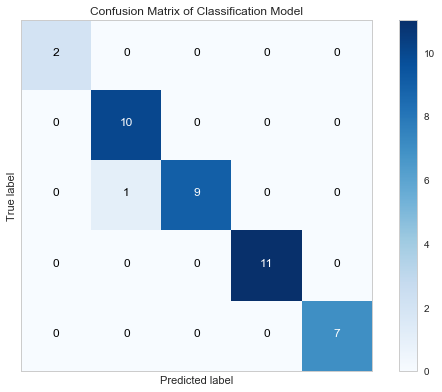

In [22]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test_inertial, y_predicted_inertial)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Classification Model')
plt.figure()
plt.show()

In [23]:
# store and export the predicted result 
# pd.DataFrame(y_predicted_inertial).to_csv('inertial_predicted_5.csv')

## 3.2 Action Recognition using Skeleton Dataset

In [24]:
# perform test train split for classification model building using skeleton features
x_train_skeleton, x_test_skeleton, y_train_skeleton, y_test_skeleton = train_test_split(skeleton_features, complete_activity_label, test_size=0.25, random_state=seed)

In [25]:
# fit the model
skeleton_gnb_model = gnb.fit(x_train_skeleton, y_train_skeleton)

In [26]:
# predict the action using the built classsification model
y_predicted_skeleton = skeleton_gnb_model.predict(x_test_skeleton)

In [27]:
# evaluate the confusion matrix and accuracy of model built using test data of skeleton dataset
print(confusion_matrix(y_test_skeleton, y_predicted_skeleton))
print(classification_report(y_test_skeleton, y_predicted_skeleton))

score = accuracy_score(y_test_skeleton, y_predicted_skeleton)
print("Validation accuracy: {:.2%}".format(score))

[[ 2  0  0  0  0]
 [ 0  5  2  1  2]
 [ 0  1  4  1  4]
 [ 0  0  0 11  0]
 [ 0  0  3  2  2]]
             precision    recall  f1-score   support

       clap       1.00      1.00      1.00         2
 swipt_left       0.83      0.50      0.62        10
swipt_right       0.44      0.40      0.42        10
      throw       0.73      1.00      0.85        11
       wave       0.25      0.29      0.27         7

avg / total       0.61      0.60      0.59        40

Validation accuracy: 60.00%


Confusion matrix


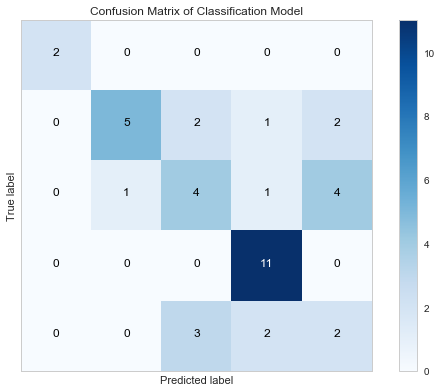

In [28]:
# evaluate the confusion matrix and accuracy of model built using test data of skeleton dataset
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test_skeleton, y_predicted_skeleton)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Classification Model')
plt.figure()
plt.show()

In [29]:
# store and export the predicted result 
# pd.DataFrame(y_predicted_skeleton).to_csv('skeleton_predicted_5.csv')

## 3.3 Action Recognition using Depth Dataset

In [30]:
# perform test train split for classification model building using depth features
x_train_depth, x_test_depth, y_train_depth, y_test_depth = train_test_split(depth_features, complete_activity_label, test_size=0.25, random_state=seed)

In [31]:
# fit the model
depth_gnb_model = gnb.fit(x_train_depth, y_train_depth)

In [32]:
# predict the action using the built classsification model
y_predicted_depth = depth_gnb_model.predict(x_test_depth)

In [33]:
# evaluate the confusion matrix and accuracy of model built using test data of depth dataset
print(confusion_matrix(y_test_depth, y_predicted_depth))
print(classification_report(y_test_depth, y_predicted_depth))

score = accuracy_score(y_test_depth, y_predicted_depth)
print("Validation accuracy: {:.2%}".format(score))

[[ 1  1  0  0  0]
 [ 0  9  0  1  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  1]
 [ 0  0  0  0  7]]
             precision    recall  f1-score   support

       clap       1.00      0.50      0.67         2
 swipt_left       0.90      0.90      0.90        10
swipt_right       1.00      1.00      1.00        10
      throw       0.91      0.91      0.91        11
       wave       0.88      1.00      0.93         7

avg / total       0.93      0.93      0.92        40

Validation accuracy: 92.50%


Confusion matrix


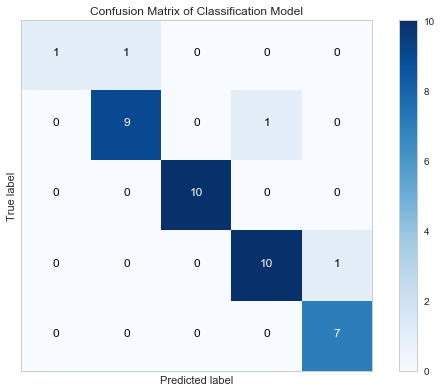

In [34]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test_depth, y_predicted_depth)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Classification Model')
plt.figure()
plt.show()

In [35]:
# store and export the predicted result 
# pd.DataFrame(y_predicted_depth).to_csv('depth_predicted_5.csv')

# 4.0 Action Recognition using Multimodal Sensors Fusion

In [36]:
# convert the predicted action for multimodal sensors to dataframe
df_y_predicted_inertial = pd.DataFrame(y_predicted_inertial) 
df_y_predicted_skeleton = pd.DataFrame(y_predicted_skeleton) 
df_y_predicted_depth = pd.DataFrame(y_predicted_depth)

In [37]:
# concatenate the dataframe and rename the column
df_y_predicted_fusion = pd.concat([df_y_predicted_inertial, df_y_predicted_skeleton, df_y_predicted_depth], axis=1)
df_y_predicted_fusion.columns = ['Inertial', 'Skeleton', 'Depth']

In [38]:
############################################################################################
###define a algorithm for action recognition using fusion data using simple voting method###
############################################################################################
# 1. recognise as true action from majority models if two or above sensors recognised as a same action
# 2. recognise as true action from inertial model if three sensors give 3 different recognition of action

df_y_predicted_fusion['Final'] = 'initial'
for index, row in df_y_predicted_fusion.iterrows():
    if (df_y_predicted_fusion['Inertial'][index] == df_y_predicted_fusion['Skeleton'][index]):
        df_y_predicted_fusion['Final'][index] = df_y_predicted_fusion['Inertial'][index]       
    elif (df_y_predicted_fusion['Inertial'][index] == df_y_predicted_fusion['Depth'][index]):
        df_y_predicted_fusion['Final'][index] = df_y_predicted_fusion['Inertial'][index]
    elif (df_y_predicted_fusion['Skeleton'][index] == df_y_predicted_fusion['Depth'][index]):
        df_y_predicted_fusion['Final'][index] = df_y_predicted_fusion['Skeleton'][index]
    else:
        df_y_predicted_fusion['Final'][index] = df_y_predicted_fusion['Inertial'][index]

In [39]:
# verify the predicted action using fusion data
df_y_predicted_fusion.head(20)

,Inertial,Skeleton,Depth,Final
0,throw,throw,throw,throw
1,throw,throw,throw,throw
2,clap,clap,clap,clap
3,wave,throw,wave,wave
4,swipt_left,wave,swipt_left,swipt_left
5,wave,wave,wave,wave
6,wave,swipt_right,wave,wave
7,throw,throw,wave,throw
8,swipt_left,swipt_left,swipt_left,swipt_left
9,swipt_left,wave,swipt_left,swipt_left


In [40]:
# evaluate the confusion matrix and accuracy of model built using test data of fusion of multimodal sensors
y_test_fusion = y_test_inertial
y_predicted_fusion = df_y_predicted_fusion['Final'].as_matrix()

# evaluate the confusion matrix and accuracy of model built using test data 
print(confusion_matrix(y_test_fusion, y_predicted_fusion))
print(classification_report(y_test_fusion, y_predicted_fusion))

score = accuracy_score(y_test_fusion, y_predicted_fusion)
print("Validation accuracy: {:.2%}".format(score))

[[ 2  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0  7]]
             precision    recall  f1-score   support

       clap       1.00      1.00      1.00         2
 swipt_left       1.00      1.00      1.00        10
swipt_right       1.00      1.00      1.00        10
      throw       1.00      1.00      1.00        11
       wave       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        40

Validation accuracy: 100.00%


Confusion matrix


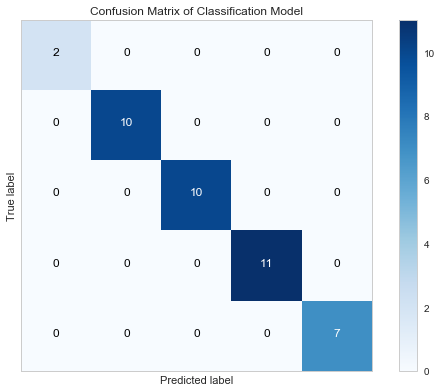

In [41]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test_fusion, y_predicted_fusion)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Classification Model')
plt.figure()
plt.show()